## Data Analysis Mathematics, Algorithms and Modeling

# AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

#### Introduction

In the next phase of recepe recommandation system, Data related to user feedback and rating are taken into consideration with the existing recepe data with a view to identify insights about user's preferences and engagement with the recepe. This will help to identify corelation between recepe characteristics and user preferences 

### Dataset & Programming Requirements

##### Ractangular Dataset : files
1. Raw_recepes.csv
2. Raw_interaction.csv

##### Import Libraries

In [10]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as zscore

##### RawRecipe : Dataset in classes and methods

In [11]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data

##### RAW_interactions : Dataset in classes and methods

In [12]:
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

#### The main function : Initialise class objects & load data

In [13]:
if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()

---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



#### Merge dataset based on recepe Id

In [16]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(2)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...


### Null hypothesis
Recipe rating is propotional to preperation time i.e more the preperation time , more ratings recepe get

### Alternet hypothesis
Preperation time does not have any relation with user rateing

d:\Conestoga\PROG8431-DAM\PROG8431\venvPROG8431\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


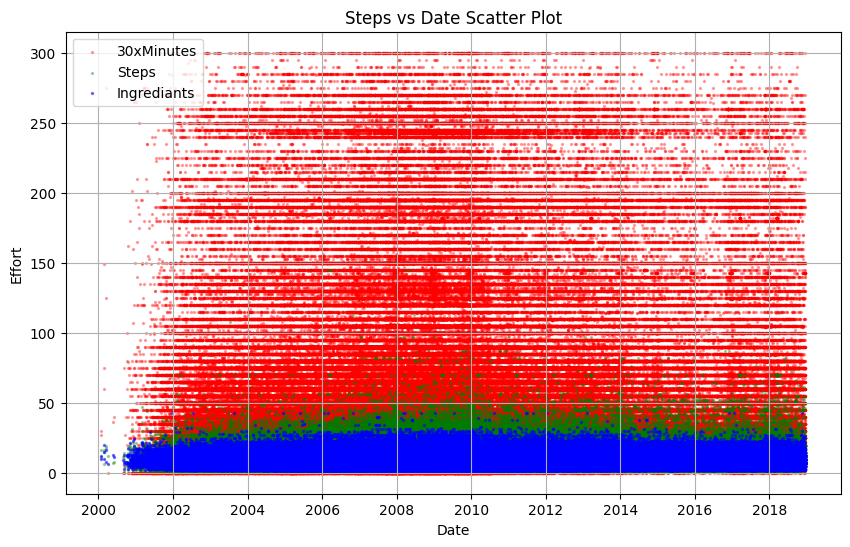

In [32]:
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Sort values by date to ensure proper plotting
df = merged_data.sort_values(by='date')
df = df[df['minutes'] <= 300]

plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['minutes'], color='r', label='30xMinutes', alpha=0.3,s=2)
plt.scatter(df['date'], df['n_steps'], color='g', label='Steps', alpha=0.3,s=2)
plt.scatter(df['date'], df['n_ingredients'], color='b', label='Ingrediants', alpha=0.5,s=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Effort')
plt.title('Steps vs Date Scatter Plot')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

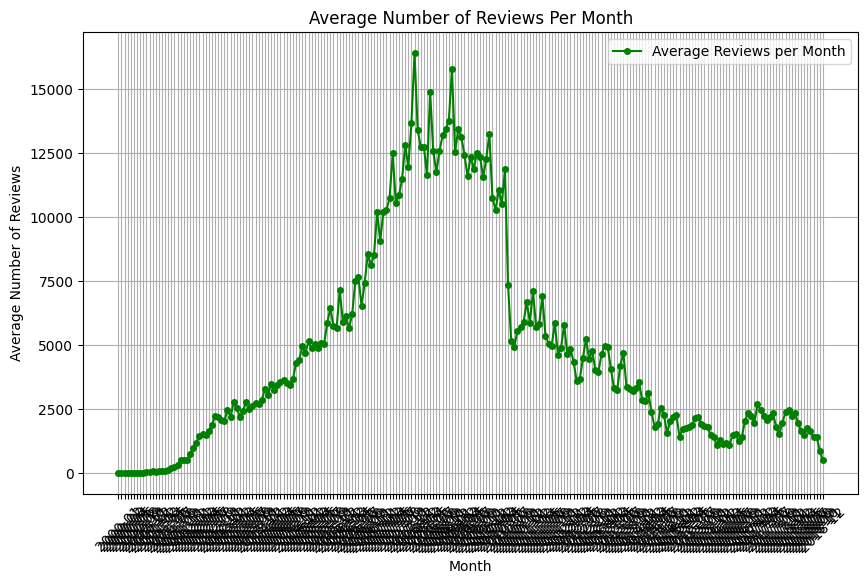

In [38]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(merged_data['date'])
df['month'] = df['date'].dt.to_period('M')

# Group by 'date' and count the number of reviews for each date
reviews_per_date = df.groupby('date').size()  # size() counts the number of occurrences (i.e., reviews)
reviews_per_month = df.groupby('month').size().reset_index(name='review_count')

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(reviews_per_month['month'].astype(str), reviews_per_month['review_count'], marker='o', color='g', label='Average Reviews per Month', linewidth=1.5, markersize=4)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews Per Month')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()
